# Vectores y Convolución

En lecciones anteriores, se vió la operación promedio para completar un pixel cuyo valor es cero.

![title](media/vecindario.png)

1 - 8 son los pixeles vecinos. Se usan estos valores para completar el pixel faltante.

En general, el concepto de "Procesamiento por Vecindario" significa modificar el valor de un pixel, utilizando la información de los pixeles que lo rodean.

Las operaciones que se realizan en un procesamiento por vecindario, normalmente siguen los siguientes pasos: sea $A \in {\rm I\!R}^{mxn}$ una imagen a escala de grises

\begin{array}{|c|c|c|} \hline
A_{i-1,j-1} & A_{i-1,j} & A_{i-1,j+1} \\\hline
A_{i,j-1}   & A_{i,j}   & A_{i,j+1}   \\\hline
A_{i+1,j-1} & A_{i+1,j} & A_{i+1,j+1} \\\hline
\end{array}

1. Definir un pixel de la imagen: $A_{i,j}$
2. Desarrollar una operación que involucre los pixeles del vecindario: $A_{i-1,j-1}, A_{i-1,j}, \ldots, A_{i+1,j+1}$
3. Sea $B \in {\rm I\!R}^{mxn}$ la imagen de salida. Aplicar el resultado de la operación en la misma coordenada $(i, j)$ de la imagen $B$.
4. Repetir el proceso para todos los pixeles.

Nota. En esta parte del curso estudiaremos un conjunto de métodos relacionados con el procesamiento por vecindario que involucra la operación de convolución.

## Convolución en una dimensión para vectores de dimensión infinita
Sean $x$ y $y$ dos vectores de dimensión infinita

\begin{equation}
x = [\ldots, x_{-3}, x_{-2}, x_{-1}, x_{0}, x_{1}, x_{2}, x_{3}, \ldots]
\end{equation}
\begin{equation}
y = [\ldots, y_{-3}, y_{-2}, y_{-1}, y_{0}, y_{1}, y_{2}, y_{3}, \ldots]
\end{equation}

La convolución entre $x$ y $y$ es el vector $z$ de dimensión infinita definida por

\begin{equation}
z = \left( x * y \right)_{j} = \sum_{i=-\infty}^{\infty}x(i)*y(j-i)
\end{equation}

## Convolución en una dimensión para vectores de dimensión finita
Sea $x=[x_1, \ldots, x_m]^T \in {\rm I\!R}^{m}$ y $y=[y_1, \ldots, y_n]^T \in {\rm I\!R}^{n}$. Entonces la convolución de $x$ y $y$ es el vector $z \in {\rm I\!R}^{m+n-1}$, definido por:

\begin{equation}
z_i = \left( x * y \right)_{i} = \sum_{j}x_{j}*y_{i-j+1}
\end{equation}

donde $j \in \{\underbrace{max(1, i+1-n)}_\text{inicio}, \ldots, \underbrace{min(i, m)}_\text{final}\}$.

In [1]:
% Ejemplo de convolucion en 1D
clc; clear;
x = rand(1, 100); m = length(x);
y = rand(1, 100); n = length(y);
z = zeros(1, m + n - 1); % Crear vector donde se almacena la convolucion
% Realizar la convolucion de manera manual
tic
for i = 1:m+n-1
  v_in = max([1 i+1-n]);
  v_fin = min([i m]);
  for j = v_in:v_fin
    z(i) = z(i) + x(j) * y(i - j + 1);
  endfor
endfor
t1 = toc

% Comando de Octave
tic;
zz = conv(x, y);
t2 = toc
norm(z - zz)

t1 =  0.25003
t2 =  0.022705
ans =    6.0440e-14


## Convolución en dos dimensiones para matrices de dimensión finita
Sea $A \in {\rm I\!R}^{m_1 \times n_1}$, $B \in {\rm I\!R}^{m_2 \times n_2}$. La convolución de $A$ y $B$ es una matriz $C \in {\rm I\!R}^{(m_1 + m_2 - 1) \times (n_1 + n_2 - 1)}$, definida por:

\begin{equation}
C_{j,k} = (A * B)_{i, j} = \sum_p \sum_q A_{p, q} \cdot B_{j - p + 1, k - q + 1}
\end{equation}

donde 

\begin{equation}
p \in \{ max(1, j - m_2 + 1), \ldots, min(j, m_1) \}
\end{equation}
\begin{equation}
q \in \{ max(1, k - n_2 + 1), \ldots, min(k, n_1) \}
\end{equation}

En GNU Octave el comando 'conv2(A, B)' realiza la convolución entre las matrices $A$ y $B$.

**Ejemplo.** Implementar la fórmula de convolución de matrices y calcule $A * B$, donde 

\begin{equation}
A = 
\begin{bmatrix}
-2 & 1 & 2\\ 
1  & 2 & 3\\ 
1  & 1 & 1
\end{bmatrix}
\quad
B = 
\begin{bmatrix}
-4 & 3 & 4\\ 
0  & 0 & 0
\end{bmatrix}
\end{equation}

In [2]:
% Implementacion de la fórmula de convolucion de matrices
clc; clear;
A = [-2 1 2; 1 2 3; 1 1 1];
B = [-4 3 4; 0 0 0];
[m1, n1] = size(A);
[m2, n2] = size(B);
C1 = zeros(m1+m2-1, n1+n2-1);

tic
%--------------------- Inicio Primera sumatoria -------------------%
for j = 1:m1+m2-1
  p_in = max([1 j-m2+1]); % p inicial
  p_fin = min([j m1]); % p final
  
  for p = p_in:p_fin
  %------------------- Inicio Segunda sumatoria -------------------%  
    for k = 1:n1+n2-1
      q_in = max([1, k-n2+1]); % q inicial
      q_fin = min([k n1]); % q final
      
      for q = q_in:q_fin  
        C1(j, k) = C1(j, k) + A(p, q) * B(j-p+1, k-q+1);
      endfor
    endfor  
  %------------------- Final Segunda sumatoria --------------------%
  endfor  
endfor
%--------------------- Final Primera sumatoria --------------------%
t1 = toc

% Metodo de Octave para calcular la convolucion
tic;
C2 = conv2(A, B);
t2 = toc
norma = norm(C1 - C2)
C1

t1 =  0.17213
t2 =  0.027402
norma = 0
C1 =

    8  -10  -13   10    8
   -4   -5   -2   17   12
   -4   -1    3    7    4
    0    0    0    0    0



## Aplicación de la convolución en imágenes
$A \in {\rm I\!R}^{m \times n}$ una imagen en escala de grises. Sea $B \in {\rm I\!R}^{3 \times 3}$. 
Dependiendo del valor de $B$, se puede aplicar una transformación a la imagen A, a través de la convolución

- $B = 
\begin{bmatrix}
-2 & 1 & 2\\ 
1  & 2 & 3\\ 
1  & 1 & 1
\end{bmatrix}$, entonces $B$ es un filtro paso alto.

Note que $(A * B) \in {\rm I\!R}^{(m+2) \times (n+2)}$. Por lo tanto, en imágenes, se eliminará la primera y última fila, y la primera y última columna, es decir, se considerará solo el centro.

- $B = \dfrac{1}{a} 
\begin{bmatrix}
1 & 1 & 1\\ 
1 & 1 & 1\\ 
1 & 1 & 1
\end{bmatrix}$, entonces $B$ es un filtro paso bajo.



- $B =
\begin{bmatrix}
1 & 1 & 1\\ 
0 & 0 & 0\\ 
-1 & -1 & -1
\end{bmatrix}$, entonces $B$ detecta bordes horizontales.



- $B =
\begin{bmatrix}
1 & 0 & -1\\ 
1 & 0 & -1\\ 
1 & 0 & -1
\end{bmatrix}$, entonces $B$ detecta bordes verticales.



- $B =
\begin{bmatrix}
-1 & -1 & -1\\ 
-1 &  8 & -1\\ 
-1 & -1 & -1
\end{bmatrix}$, entonces $B$ detecta en general.

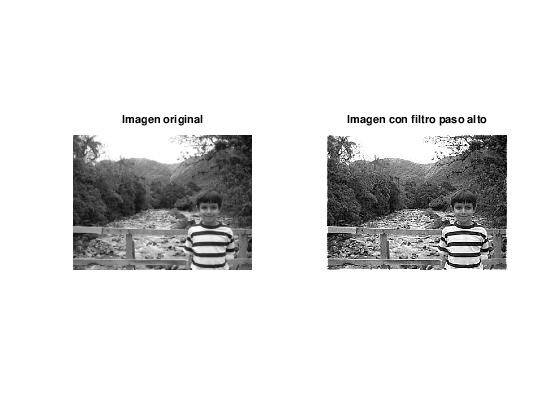

In [3]:
% Ejemplo de convolucion en imagenes
clc; clear;
pkg load image;

A = imread('media/child.jpg');
subplot(1, 2, 1);
imshow(A);
title('Imagen original');

% Crear matriz B
B = [0 -1 0; -1 5 -1; 0 -1 0]; % Filtro Paso-Alto
A = double(A);
C = conv2(A, B);
[m, n] = size(A);
C = uint8(C(2:m+1, 2:n+1));
subplot(1, 2, 2);
imshow(C);
title('Imagen con filtro paso alto');

In [4]:
% Ejemplo de convolucion en imagenes
clc; clear;
pkg load image;

A = imread('media/baby_yoda.jpg');
% subplot(1, 4, 1);
% imshow(A);
% title('Imagen original');

% Crear matriz B
B = [1 1 1; 0 0 0; -1 -1 -1]; % Detectar bordes horizontales
A = double(A);
C = conv2(A, B);
[m, n] = size(A);
C = uint8(C(2:m+1, 2:n+1));
% subplot(1, 4, 2);
% imshow(C);
% title('Bordes horizontales');

% Crear matriz B
B = [1 0 -1; 1 0 -1; 1 0 -1]; % Detectar bordes verticales
A = double(A);
C = conv2(A, B);
[m, n] = size(A);
% C = uint8(C(2:m+1, 2:n+1));
% subplot(1, 4, 3);
% imshow(C);
% title('Bordes verticales');

% Crear matriz B
B = [-1 -1 -1; -1 8 -1; -1 -1 -1]; % Detectar bordes en general
A = double(A);
C = conv2(A, B);
[m, n] = size(A);
C = uint8(C(2:m+1, 2:n+1));
% subplot(1, 4, 4);
% imshow(C);
% title('Bordes');

![title](media/convolucion-imagenes.png)

In [5]:
% Ejemplo de convolucion en imagenes
clc; clear;
pkg load image;

A = imread('media/baby_yoda.jpg');

% Crear matriz B
B1 = [1 1 1; 0 0 0; -1 -1 -1]; % Detectar bordes horizontales
B2 = [1 0 -1; 1 0 -1; 1 0 -1]; % Detectar bordes verticales
A = double(A);
C1 = conv2(A, B1);
C2 = conv2(A, B2);
[m, n] = size(A);
C1 = uint8(C1(2:m+1, 2:n+1));
C2 = uint8(C2(2:m+1, 2:n+1));

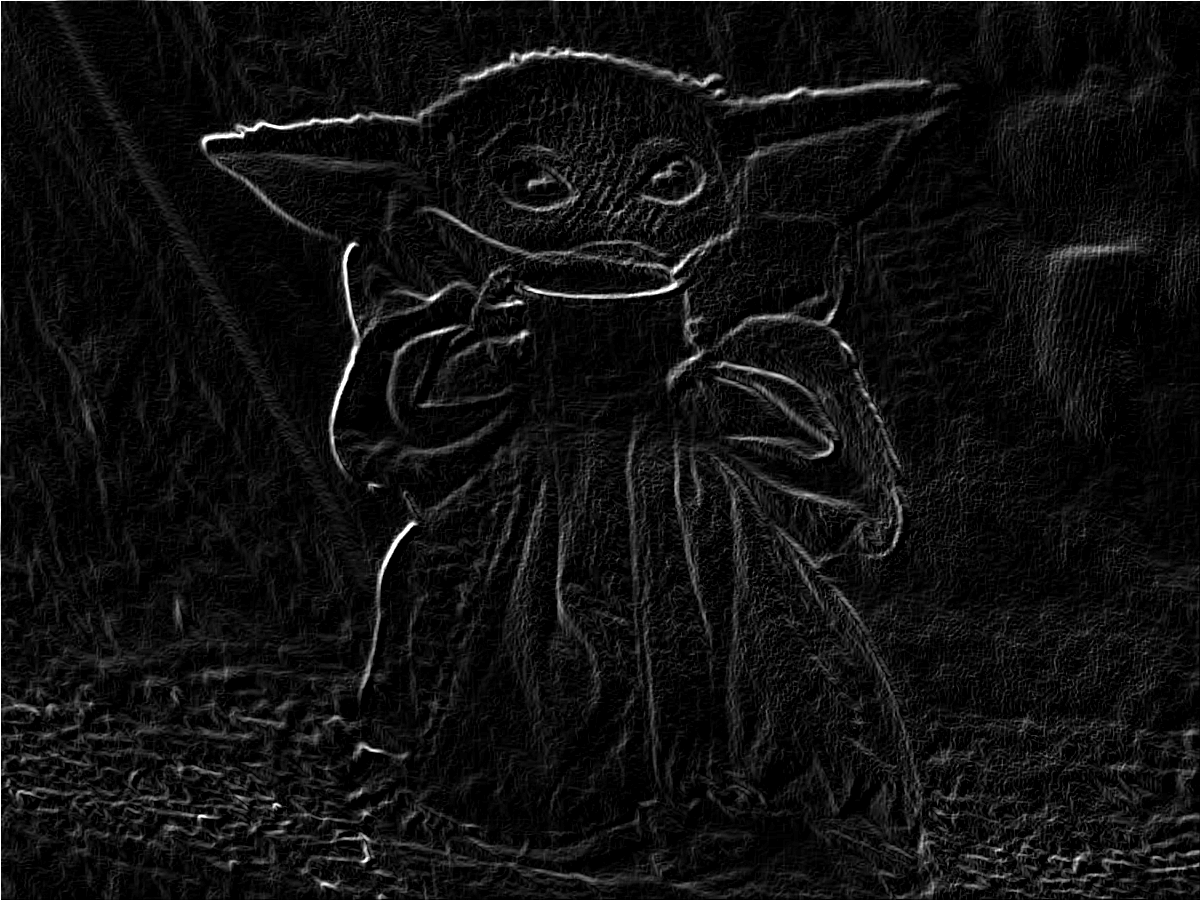

In [6]:
imshow((C1+C2)/2)